In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.datasets import make_imbalance
%matplotlib inline

# Carregando os dados a partir do csv
data1 = pd.read_csv("data/student-mat.csv")
data2 = pd.read_csv("data/student-por.csv")

In [252]:
data = pd.concat([data1,data2])

In [253]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [254]:
#data = data[["sex","age","freetime","traveltime","studytime","goout","famrel","G2","Walc","Dalc","address"]]
data = data[["sex","freetime","traveltime","studytime","goout","G3","Walc","Dalc","failures","famsize"]]

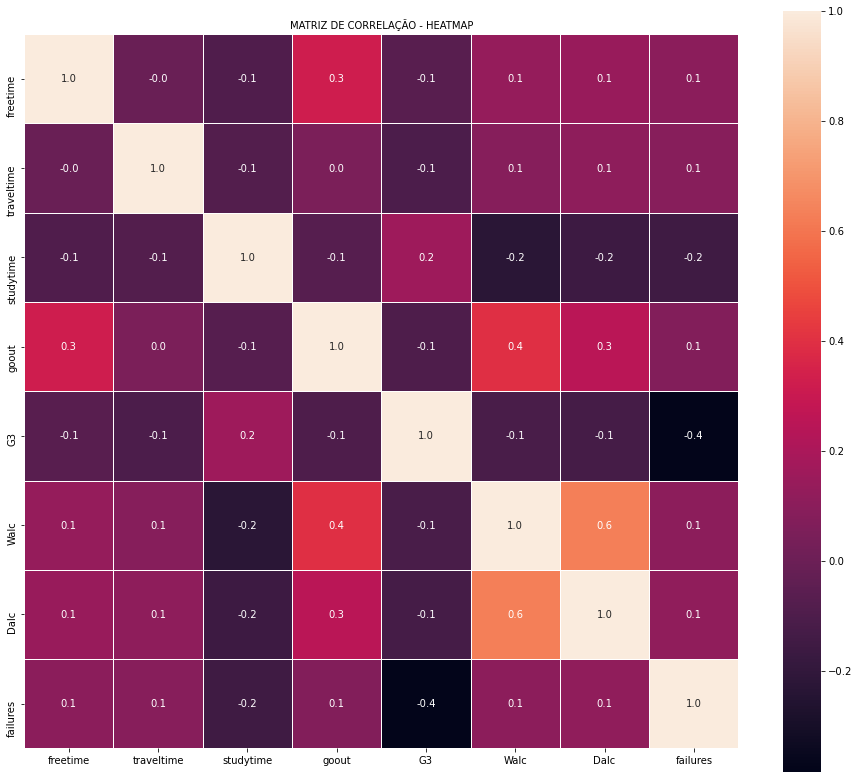

In [255]:
corr = data.corr() 
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('MATRIZ DE CORRELAÇÃO - HEATMAP', size=10);

In [256]:
pd.set_option('display.max_columns', None)
clean_data = pd.get_dummies(data, drop_first=True)

In [257]:
dalc = clean_data.copy()
walc = clean_data.copy()

dalc.loc[(dalc.Dalc < 2), 'Dalc' ] = 0 
dalc.loc[(dalc.Dalc >= 2), 'Dalc' ] = 1 

walc.loc[(walc.Walc < 2), 'Walc' ] = 0 
walc.loc[(walc.Walc >= 2), 'Walc' ] = 1

pd.set_option('display.max_columns', None)
clean_data = pd.get_dummies(data, drop_first=True)

In [258]:
dalc[dalc["Dalc"] == 1]

,freetime,traveltime,studytime,goout,G3,Walc,Dalc,failures,sex_M,famsize_LE3
2,3,1,2,2,10,3,1,3,0,1
18,5,1,1,5,5,4,1,3,1,0
23,4,2,2,4,12,4,1,0,1,1
27,2,1,1,4,15,4,1,0,1,0
29,4,1,2,5,11,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
635,5,1,2,4,9,3,1,0,0,0
640,4,2,1,3,0,3,1,1,1,0
643,4,3,1,3,10,2,1,0,0,0
647,4,2,1,5,10,4,1,0,1,1


In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, RidgeClassifierCV, LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.linear_model import lasso_path, enet_path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

#import tensorflow as tf
import numpy as np
import itertools

In [260]:
data_model = dalc.drop('Walc', axis=1)
data_model_2 = walc.drop('Dalc', axis=1)

In [261]:
# Dividindo o conjunto

X = data_model.drop('Dalc', axis=1)
y = data_model['Dalc']

X_2 = data_model_2.drop('Walc', axis=1)
y_2 = data_model_2["Walc"]

In [262]:
dalc["Dalc"].value_counts()

0    727
1    317
Name: Dalc, dtype: int64

In [263]:
walc["Walc"].value_counts()

1    646
0    398
Name: Walc, dtype: int64

In [304]:
#USANDO WALC X_2
X_train, Y_train = make_imbalance(X_2, y_2,sampling_strategy={0: 398, 1: 450} ,random_state=10) #, sampling_strategy={0: 1500, 1: 1500, 2: 1500, 3: 1500},random_state=14)

In [305]:
#Para o Dalc---------------------------------------------------------------------------------------
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X1, columns = X_train.columns)
X_train
#pca = PCA(30)
#pca_X = pca.fit(X1)

#X_pca = pd.DataFrame(pca_X.transform(X1))
#X_pca.head()

,freetime,traveltime,studytime,goout,G3,failures,sex_M,famsize_LE3
0,0.0,3.0,2.0,-0.5,0.50,0.0,0.0,0.0
1,-1.0,0.0,1.0,0.0,-0.50,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.75,0.0,0.0,1.0
4,-2.0,0.0,1.0,-0.5,-0.25,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
843,-2.0,1.0,0.0,0.0,-0.75,0.0,0.0,1.0
844,-1.0,1.0,0.0,1.0,-1.25,0.0,0.0,0.0
845,0.0,1.0,0.0,0.0,0.50,0.0,1.0,0.0
846,-1.0,1.0,0.0,-0.5,0.50,0.0,0.0,1.0


In [306]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def clf_eval(clf, X, y_true, classes=['Não bebe', 'Bebe']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    #print('Classification Report')
    #print(classification_report(y_true, y_pred, target_names=classes))
    #print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    #print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    #print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    #print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    #plott = plot_confusion_matrix(clf_matrix, classes=classes)
    plot_confusion_matrix(clf_matrix, classes=classes)
    return [roc_auc_score(y_true, y_pred)] #, plott]

Confusion matrix, without normalization
[[46 41]
 [22 61]]


[0.6318376956100263]

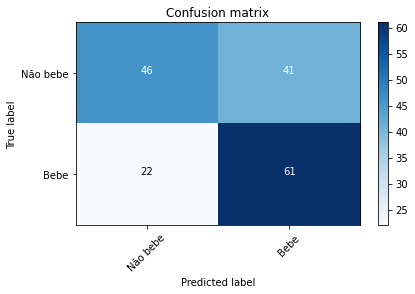

In [307]:
#RIDGE CLASSIFIER
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state = 13)      #X_pca, y, test_size=0.2)#, random_state=semente)
ridgecv = RidgeClassifierCV().fit(X_train, Y_train)
y_pred_ = ridgecv.predict(X_test)
ridgecv.score(X_test, Y_test)
clf_eval(ridgecv, X_test, Y_test)

Confusion matrix, without normalization
[[46 41]
 [22 61]]


[0.6318376956100263]

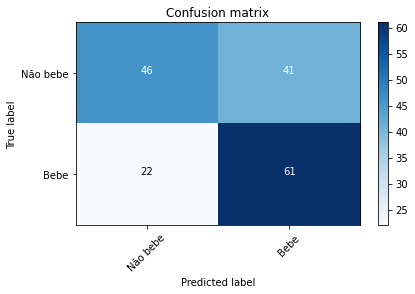

In [308]:
#REGRESSÃO LOGÍSTICA
logisR = LogisticRegression().fit(X_train, Y_train)
y_pred = logisR.predict(X_test)
logisR.score(X_test, Y_test)
clf_eval(logisR, X_test, Y_test)


Confusion matrix, without normalization
[[30 57]
 [18 65]]


[0.5639800581636892]

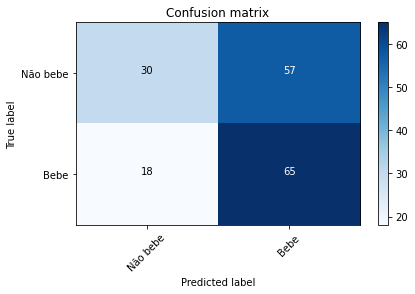

In [309]:
#PERCEPTRON
percep = Perceptron().fit(X_train, Y_train)
y_pred = percep.predict(X_test)
percep.score(X_test, Y_test)
clf_eval(percep, X_test, Y_test)

Confusion matrix, without normalization
[[55 32]
 [64 19]]


[0.4305497853482897]

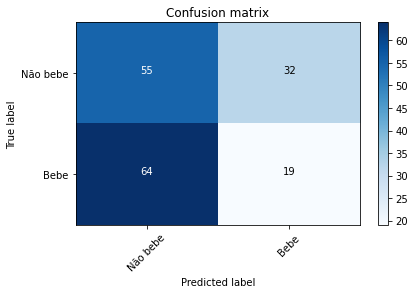

In [310]:
#PASSIVE AGRESSIVE ALGORITHM
PAC = PassiveAggressiveClassifier().fit(X_train,Y_train)
#y_pred = PAC.predict(X_test)
PAC.score(X_test, y_pred)
clf_eval(PAC, X_test, Y_test)

Confusion matrix, without normalization
[[52 35]
 [29 54]]


[0.6241517795319207]

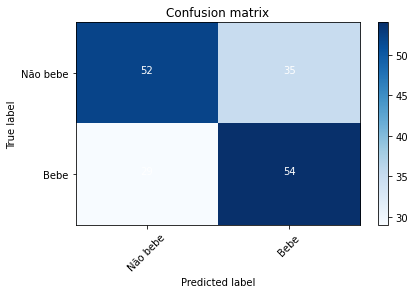

In [311]:
#DECISION TREE
DTC = DecisionTreeClassifier().fit(X_train,Y_train)
y_pred = DTC.predict(X_test)
DTC.score(X_test, Y_test)
clf_eval(DTC, X_test, Y_test)

Confusion matrix, without normalization
[[59 28]
 [21 62]]


[0.7125744356737294]

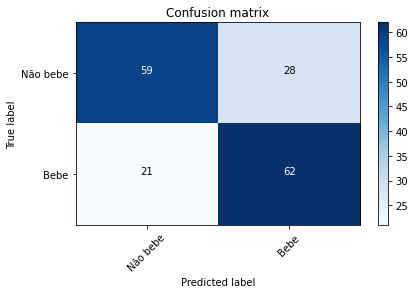

In [312]:
#RANDOM FOREST
RFC = RandomForestClassifier().fit(X_train,Y_train)
y_pred = RFC.predict(X_test)
RFC.score(X_test, Y_test)
clf_eval(RFC, X_test, Y_test)

In [313]:
# Get numerical feature importances
importances = list(RFC.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [314]:
data.columns

Index(['sex', 'freetime', 'traveltime', 'studytime', 'goout', 'G3', 'Walc',
       'Dalc', 'failures', 'famsize'],
      dtype='object')

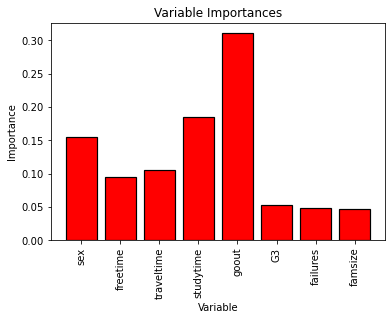

In [315]:
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, data.drop(["Walc","Dalc"], axis = 1).columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [316]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [317]:
#PROCURAR MELHOR MÉTRICA PARA O RANDOM FOREST
'''lista = []
for i in range(0,100):
    #print(i)
    X_train, Y_train = make_imbalance(X_2, y_2,sampling_strategy={0: 151, 1: 200} ,random_state=i)
    X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state = 13)
    RFC = RandomForestClassifier().fit(X_train,Y_train)
    lista.append(RFC.score(X_test, Y_test))'''

'lista = []\nfor i in range(0,100):\n    #print(i)\n    X_train, Y_train = make_imbalance(X_2, y_2,sampling_strategy={0: 151, 1: 200} ,random_state=i)\n    X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state = 13)\n    RFC = RandomForestClassifier().fit(X_train,Y_train)\n    lista.append(RFC.score(X_test, Y_test))'

In [318]:
max(lista)

0.8028169014084507

In [319]:
lista.index(max(lista)) #random state do segundo é 13

10

In [320]:
#0: 349 
#1: 646
#VAMOS ESCOLHER ESTE POIS POSSUIU O MELHOR DESEMPRENHO DE TODOS OS OUTROS
'''X_train, Y_train = make_imbalance(X_2, y_2,sampling_strategy={0: 349, 1: 350} ,random_state=30)
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state = 1)
RFC = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=2,
 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
  bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None,
   ccp_alpha=0.0, max_samples=None).fit(X_train,Y_train)
RFC.score(X_test, Y_test)
clf_eval(RFC, X_test, Y_test)'''

"X_train, Y_train = make_imbalance(X_2, y_2,sampling_strategy={0: 349, 1: 350} ,random_state=30)\nX_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state = 1)\nRFC = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=2,\n min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,\n  bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None,\n   ccp_alpha=0.0, max_samples=None).fit(X_train,Y_train)\nRFC.score(X_test, Y_test)\nclf_eval(RFC, X_test, Y_test)"

In [321]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [322]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [323]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [324]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
